In [1]:
import time
now = time.time()

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dataset = pd.read_csv('DataSets/DatasetsCreated/train_dataset.csv')
train_dataset.shape

(1015389, 93)

In [4]:
test_dataset = pd.read_csv('DataSets/DatasetsCreated/test_dataset.csv')
test_dataset.shape

(113640, 90)

In [5]:
test_dataset = test_dataset.replace([np.inf, -np.inf], 0)
test_dataset.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Count,DateTrack,DayNum,Discount,...,UserRedeemRecent,MerchantBuysRecent,MerchantReleasesRecent,MerchantRedeemRecent,CouponReleasesRecent,CouponRedeemRecent,MerchantUserReleasesRecent,MerchantUserRedeemRecent,NewMerchantOldUser,OldMerchantNewUser
0,4129537,450,9983.0,"[30, 5, 0.833]",1,2016-07-12,NaN,2016-07-12,194,30:5,...,0,3,0,3,0,0,0,0,1,0
1,6949378,1300,3429.0,"[30, 5, 0.833]",2,2016-07-06,NaN,2016-07-06,188,30:5,...,0,6,0,0,0,0,1,0,0,0
2,2166529,7113,6928.0,"[200, 20, 0.9]",5,2016-07-27,NaN,2016-07-27,209,200:20,...,0,0,0,0,0,0,1,0,0,0
3,2166529,7113,1808.0,"[100, 10, 0.9]",5,2016-07-27,NaN,2016-07-27,209,100:10,...,0,0,0,0,0,0,1,0,0,0
4,6172162,7605,6500.0,"[30, 1, 0.967]",2,2016-07-08,NaN,2016-07-08,190,30:1,...,0,7,0,2,0,1,1,0,0,0


## Categorical Data

In [6]:
# categorical_features = ['Tag', 'Purchaser', 'Merchant_Popular']
# for feature in categorical_features:
#     train_dataset[feature] = pd.Categorical(train_dataset[feature])

# One Hot Encoding
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['Tag'], prefix='Tag',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['DayOfWeek'], prefix='DayOfWeek',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)


In [7]:
train_dataset.columns[:100]

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date', 'Count', 'DateTrack', 'DayNum', 'Discount',
       'Original_price', 'Discounted_price', 'Rate', 'Tag', 'User_Released',
       'User_Redeemed', 'User_Ratio', 'User_Buys', 'Purchaser',
       'UserMerchantCount', 'DayList', 'UserReleaseList', 'UserRedeemList',
       'User_Redeemed_Buy', 'Merchant_Redeemed', 'Merchant_Ratio',
       'Merchant_AvgDistance', 'Merchant_Popular', 'Merchant_AvgRate',
       'AvgDailyUsers', 'MerchantBuyList', 'MerchantReleaseList',
       'MerchantRedeemList', 'UniqueUsersCount', 'Merchant_Buys',
       'Merchant_Redeemed_Buy', 'Coupon_Released', 'Coupon_Redeemed',
       'Coupon_Ratio', 'Duration', 'CouponRedeemList', 'CouponReleaseList',
       'FirstReleaseDate', 'ReleasesCount', 'ImpDay', 'Weekend', 'DayOfWeek',
       'UniqueReleasesCount', 'Merchant_User_Visit', 'Coupon_User_Visit',
       'MerchantUserReleaseList', 'MerchantUserRedeemList', 'Use

## Final Features

In [8]:
remove_columns = ['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate','Discount','Date_received',
                  'Date','Count','RedemptionDuration','DayList','DateTrack','DayNum','First_day',
                  'MerchantBuyList', 'Merchant_User_Visit', 'MerchantRedeemList','MerchantReleaseList',
                  'User_Coupon_Redeemed', 'User_Coupon_Ratio','User_discount_Ratio','Discounted_Redeemed',
                  'Coupon_User_Visit','UserReleaseList','UserRedeemList','CouponRedeemList','CouponReleaseList',
                 'MerchantUserReleaseList','MerchantUserRedeemList','FirstReleaseDate','UsersRecentMerchants',
                  'User_Merchant_Ratio', 'Visits', 'Duration', 'Merchant_AvgRate','Merchant_AvgDistance'
                 ,'UniqueUsersCount','AvgDailyUsers','UniqueReleasesCount','ReleasesCount']
unimportant_features = ['DayOfWeek','ImpDay','Merchant_Popular','Purchaser']
non_time_based = ['User_Redeemed_Buy','User_Buys','User_Redeemed','User_Released','User_Ratio',
                 'Merchant_Ratio','Merchant_Redeemed','Merchant_Buys', 'Merchant_Redeemed_Buy',
                 'Coupon_Redeemed','Coupon_Released','Coupon_Ratio']
features = list(set(train_dataset.columns)-set(remove_columns)-set(['Target'])-set(unimportant_features)-set(non_time_based))
print('Features to be included:'+str(len(features)))                  
print(features)

Features to be included:45
['MerchantUserRatioTime', 'UserReleasesTime', 'MerchantUserRedeemTime', 'MerchantBuysTime', 'NewMerchantOldUser', 'MerchantRedeemTime', 'CouponRedeemTime', 'UserRatioTime', 'MerchantUserReleasesRecent', 'UserBuysRecent', 'FirstTimeMerchantUser', 'UserReleasesRecent', 'UserRedeemRecent', 'Discounted_price', 'Original_price', 'MerchantRatioTime', 'CouponRatioTime', 'OldMerchantNewUser', 'CouponReleasesRecent', 'Tag', 'LastCouponUserVisit', 'UserRedeemTime', 'UserRedeemedBuyRatioTime', 'LastMerchantRedemption', 'FirstTimeCouponUser', 'MerchantUserRedeemRecent', 'CouponRedeemRecent', 'MerchantReleasesTime', 'Distance', 'CouponDurationTime', 'CouponReleasesTime', 'Weekend', 'UserMerchantCount', 'UserBuysTime', 'MerchantRedeemRecent', 'MerchantRedeemedBuyRatioTime', 'Rate', 'LastMerchantUserVisit', 'MerchantUserReleasesTime', 'LastMerchantVisit', 'FirstTimeUser', 'MerchantBuysRecent', 'LastUserVisit', 'FirstTimeMerchant', 'MerchantReleasesRecent']


## Positive and Negative classes distribution

0    953236
1     62153
Name: Target, dtype: int64


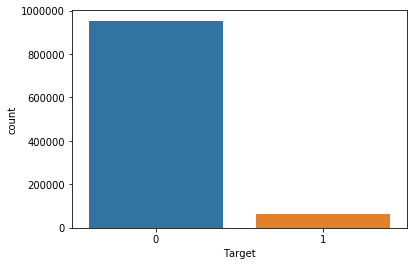

In [9]:
ax = sns.countplot(x='Target', data=train_dataset)
print(train_dataset['Target'].value_counts())

# Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE

In [11]:
def save_model(model):
    #saving model
    from sklearn.externals import joblib 

    # Save the model as a pickle in a file 
    joblib.dump(model, 'Model/xgboost.pkl') 

    # Load the model from the file 
    clf_saved= joblib.load('Model/xgboost.pkl')  


In [12]:
# y = list(train_dataset['Target'])
# X = train_dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
# X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.175)

In [13]:
X_train = train_dataset[train_dataset['DayNum']<=120]
y_train = X_train['Target']

X_val = train_dataset[(train_dataset['DayNum']>120)&(train_dataset['DayNum']<=150)]
y_val = X_val['Target']

X_test = train_dataset[train_dataset['DayNum']>150]
y_test = X_test['Target']

### XGBoost

In [14]:
def train_model():

    clf = XGBClassifier(
     n_estimators=500,
     objective= 'binary:logistic',
     nthread=3,
     scale_pos_weight=1,
     seed=410,
     alpha=0.2,
     colsample_bytree=0.8,
     gamma=1,
     learning_rate=0.1,
     max_depth=5,
     min_child_weight=5,
     subsample=0.8,
    smote__ratio=0.005,
    class_weight={0: 0.05, 1: 0.95})
    
    model = clf.fit(X_train[features], y_train)
#     save_model(model)
    
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(15, 9)
    plt.show()

    return model


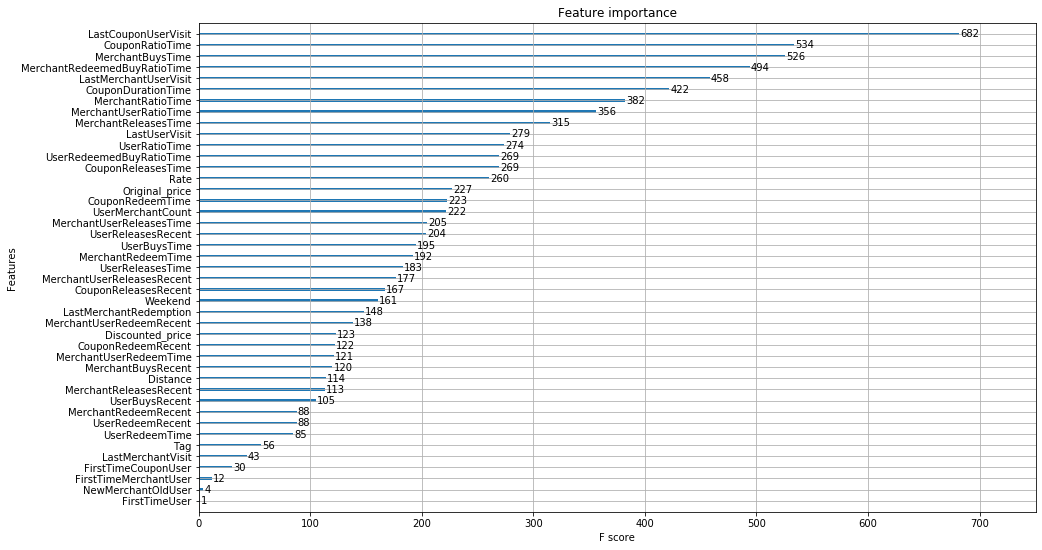

In [15]:
model = train_model()

In [16]:
# feature_importances = pd.DataFrame(model.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=True)
# feature_importances.plot(kind='barh',figsize=(10,20))

In [17]:
def evaluate_model(X_check, y_check):
    
    
    predictions = (model.predict_proba(X_check[features])[:,1]).tolist()
    predicted_values = (model.predict(X_check[features])).tolist()
    dataset = X_check.copy()
    dataset['Probability'] = [round(i, 6) for i in predictions]
    output = dataset[['User_id','Merchant_id','Date_received','Probability']]
    
    

    roc_score = round(roc_auc_score(y_check, predictions), 3)

    print('ROC AUC Score of Probailities:  '+ str(roc_score))
    print('ROC AUC Curve')
    fpr, tpr, _ = metrics.roc_curve(y_check, predictions)
    auc = metrics.roc_auc_score(y_check, predictions)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    
    predicted_values = [1 if x>0.5 else 0 for x in predictions]
    #print('AUC score of Predicted Values')
    #print(round(roc_auc_score(y_check, predicted_values), 3))
    print('______________________________________________________________________')
    print('\n The classification report for the model:')
    print(classification_report(y_check, predicted_values) )
    
    results = confusion_matrix(y_check, predicted_values) 
    print('______________________________________________________________________')
    print('\n The confusion matrix for the model:')
    print(results)
    print('______________________________________________________________________')
    
#     threshold = np.arange(0,1,0.001)
#     precision = np.zeros(len(threshold))
#     recall = np.zeros(len(threshold))
#     for i in range(len(threshold)):
#         y1 = np.zeros(len(y_check),dtype=int)
#         y1 = np.where(predictions<=threshold[i],0,1)
#         precision[i] = precision_score(y_check,y1)
#         recall[i] = recall_score(y_check,y1)

#     plt.figure(figsize=(12,9))
#     sns.set_style('whitegrid')
#     sns.lineplot(x=threshold,y=precision)
#     sns.lineplot(x=threshold,y=recall)
#     plt.xlabel('Threshold')
#     plt.title('Recall and Precision Values Vs Threshhold values')
#     plt.show()
    
    return output, dataset
    

## Validation Data Scores

ROC AUC Score of Probailities:  0.994
ROC AUC Curve


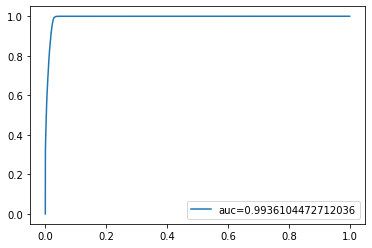

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    184858
           1       0.80      0.95      0.87     17191

    accuracy                           0.98    202049
   macro avg       0.90      0.96      0.93    202049
weighted avg       0.98      0.98      0.98    202049

______________________________________________________________________

 The confusion matrix for the model:
[[180829   4029]
 [   884  16307]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
16,165,4195,2016-05-25,0.000001
17,166,484,2016-05-25,0.000001
21,215,129,2016-05-24,0.000002
25,236,4663,2016-05-28,0.000000
31,285,450,2016-05-01,0.000000


In [18]:
val_output, val_data = evaluate_model(X_val, y_val)
val_output.head()

## Test Data Scores

ROC AUC Score of Probailities:  0.995
ROC AUC Curve


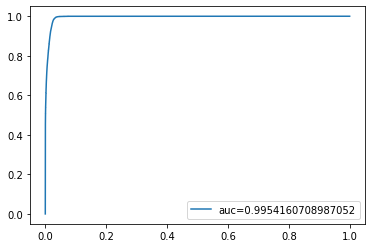

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     97492
           1       0.86      0.94      0.90     12444

    accuracy                           0.98    109936
   macro avg       0.93      0.96      0.94    109936
weighted avg       0.98      0.98      0.98    109936

______________________________________________________________________

 The confusion matrix for the model:
[[95574  1918]
 [  720 11724]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
1,4,1469,2016-06-07,0.000001
27,238,760,2016-06-08,0.000001
29,239,3465,2016-06-14,0.000000
30,239,3465,2016-06-14,0.000002
42,353,3621,2016-06-10,0.000003


In [19]:
test_output, test_data = evaluate_model(X_test, y_test)
test_output.head()

# Test Dataset and Submission File

In [20]:
predictions = (model.predict_proba(test_dataset[features])[:,1]).tolist()
predicted_values = (model.predict(test_dataset[features])).tolist()
test = pd.merge(test_dataset[features], test_dataset[['User_id','Merchant_id','Date_received']]
                , how='left',left_index=True,right_index=True)
test['Probability'] = [round(i, 6) for i in predictions]
output = test[['User_id','Merchant_id','Date_received','Probability']]

output[output['Probability']>0.5]

,User_id,Merchant_id,Date_received,Probability
512,6879802,7221,2016-07-07,0.973707
685,2855209,3251,2016-07-17,0.550224
754,2970925,7422,2016-07-14,0.685525
2211,3087229,6189,2016-07-23,0.970605
2212,3087229,6189,2016-07-15,0.882326
...,...,...,...,...
111810,6977597,5010,2016-07-08,0.756210
111818,6977597,5010,2016-07-21,0.823705
111822,6977597,5010,2016-07-27,0.567600
112876,7309637,7354,2016-07-18,0.548168


In [21]:
output.to_csv('OutputFile.csv',index=False) 


# Execution Time of this notebook

In [22]:
later = time.time()
difference = later - now
print('Time taken for the execution of this notebook: '+str(round(difference/60,2))+' mins')

Time taken for the execution of this notebook: 10.95 mins
